<a href="https://colab.research.google.com/github/ibtehaaj/Deep-Learning/blob/master/Sonar_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# if tf.__version__ < "2.0.0":
#   !pip install --upgrade tensorflow_gpu==2.0
print(tf.__version__)

2.0.0


In [0]:
tf.keras.backend.clear_session()  # For easy reset of notebook state

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

Saving sonar.csv to sonar.csv


In [0]:
dataset = pd.read_csv("sonar.csv" ,header =None)
dataset.sample()
data = dataset.values

In [0]:
x = data[:, 0:60].astype(float)
y = data[:, 60]

In [0]:
dataset = pd.read_csv("sonar.csv" ,header =None)
dataset = dataset.sample(frac=1)
data = dataset.values
# separating the last column of dataset which contains labels
x = data[:, 0:60].astype(float)  
y = data[:, 60]
# encode class values as integers(0,1)
le = LabelEncoder()
encoded_Y = le.fit_transform(y)
encoded_y_train = tf.keras.utils.to_categorical(encoded_Y)
# slicing data into training and testing datasets
# 60% training,30% testing and 10% validating
x_train = x[:128,:]
x_test = x[128:,:]
y_train = encoded_y_train[:128]
y_test = encoded_y_train[128:]

In [0]:
def build_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_dim=60),
    # tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [7]:
model = build_model()
model.fit(x_train,y_train,epochs=125,batch_size=60,verbose=2)


Train on 128 samples
Epoch 1/125
128/128 - 1s - loss: 0.7185 - accuracy: 0.4844
Epoch 2/125
128/128 - 0s - loss: 0.7021 - accuracy: 0.5000
Epoch 3/125
128/128 - 0s - loss: 0.6932 - accuracy: 0.5039
Epoch 4/125
128/128 - 0s - loss: 0.6885 - accuracy: 0.5117
Epoch 5/125
128/128 - 0s - loss: 0.6825 - accuracy: 0.5195
Epoch 6/125
128/128 - 0s - loss: 0.6768 - accuracy: 0.5664
Epoch 7/125
128/128 - 0s - loss: 0.6746 - accuracy: 0.5977
Epoch 8/125
128/128 - 0s - loss: 0.6723 - accuracy: 0.5977
Epoch 9/125
128/128 - 0s - loss: 0.6696 - accuracy: 0.6602
Epoch 10/125
128/128 - 0s - loss: 0.6668 - accuracy: 0.6758
Epoch 11/125
128/128 - 0s - loss: 0.6659 - accuracy: 0.6523
Epoch 12/125
128/128 - 0s - loss: 0.6629 - accuracy: 0.6758
Epoch 13/125
128/128 - 0s - loss: 0.6609 - accuracy: 0.6992
Epoch 14/125
128/128 - 0s - loss: 0.6591 - accuracy: 0.7109
Epoch 15/125
128/128 - 0s - loss: 0.6571 - accuracy: 0.7227
Epoch 16/125
128/128 - 0s - loss: 0.6545 - accuracy: 0.7070
Epoch 17/125
128/128 - 0s - 

In [8]:
model.evaluate(x_test,y_test,verbose=2)

80/1 - 0s - loss: 0.6051 - accuracy: 0.7312


[0.562777066230774, 0.73125]

In [0]:
#validation data
x_val = x_train[:20]
partial_x_train = x_train[20:]
y_val = y_train[:20]
partial_y_train = y_train[20:]

In [10]:
model = build_model()
history = model.fit(partial_x_train,partial_y_train,epochs=200,batch_size=60,validation_data=(x_val, y_val))

Train on 108 samples, validate on 20 samples
Epoch 1/200
108/108 [==============================] - 1s 6ms/sample - loss: 0.7046 - accuracy: 0.5000 - val_loss: 0.6872 - val_accuracy: 0.5000
Epoch 2/200
108/108 [==============================] - 0s 174us/sample - loss: 0.6925 - accuracy: 0.4954 - val_loss: 0.6807 - val_accuracy: 0.5250
Epoch 3/200
108/108 [==============================] - 0s 198us/sample - loss: 0.6867 - accuracy: 0.4861 - val_loss: 0.6753 - val_accuracy: 0.5250
Epoch 4/200
108/108 [==============================] - 0s 205us/sample - loss: 0.6838 - accuracy: 0.4815 - val_loss: 0.6711 - val_accuracy: 0.5750
Epoch 5/200
108/108 [==============================] - 0s 198us/sample - loss: 0.6796 - accuracy: 0.5093 - val_loss: 0.6684 - val_accuracy: 0.5000
Epoch 6/200
108/108 [==============================] - 0s 206us/sample - loss: 0.6764 - accuracy: 0.5324 - val_loss: 0.6650 - val_accuracy: 0.5000
Epoch 7/200
108/108 [==============================] - 0s 186us/sample - lo


1)A plot of learning curves shows overfitting if:
The plot of training loss continues to decrease with experience.
The plot of validation loss decreases to a point and begins increasing again.

2)A plot of learning curves shows underfitting if:
The training loss remains flat regardless of training.
The training loss continues to decrease until the end of training.



3)A plot of learning curves shows a good fit if:
The plot of training loss decreases to a point of stability.
The plot of validation loss decreases to a point of stability and has a small gap with the training loss.


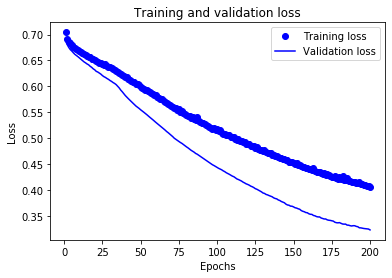

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

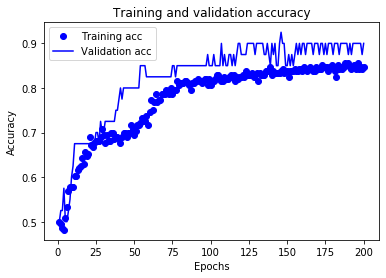

In [12]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')

plt.ylabel('Accuracy')
plt.legend()
plt.show()

# K-Fold

In [13]:
import numpy as np
k = 4
num_val_samples = len(x_train) // k
num_epochs = 100
l = []
a = []
for i in range(k):
  print('processing fold #', i)
  val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
  [x_train[:i * num_val_samples],
  x_train[(i + 1) * num_val_samples:]],
  axis=0)
  partial_train_targets = np.concatenate(
  [y_train[:i * num_val_samples],
  y_train[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
  epochs=num_epochs, batch_size=60, verbose=2)
  loss, acc = model.evaluate(val_data, val_targets, verbose=2)
  l.append(loss)
  a.append(acc)

processing fold # 0
Train on 96 samples
Epoch 1/100
96/96 - 1s - loss: 0.7284 - accuracy: 0.3958
Epoch 2/100
96/96 - 0s - loss: 0.7169 - accuracy: 0.4479
Epoch 3/100
96/96 - 0s - loss: 0.7125 - accuracy: 0.4531
Epoch 4/100
96/96 - 0s - loss: 0.7089 - accuracy: 0.4375
Epoch 5/100
96/96 - 0s - loss: 0.7062 - accuracy: 0.4062
Epoch 6/100
96/96 - 0s - loss: 0.7038 - accuracy: 0.4062
Epoch 7/100
96/96 - 0s - loss: 0.7012 - accuracy: 0.4115
Epoch 8/100
96/96 - 0s - loss: 0.6990 - accuracy: 0.4062
Epoch 9/100
96/96 - 0s - loss: 0.6977 - accuracy: 0.4115
Epoch 10/100
96/96 - 0s - loss: 0.6955 - accuracy: 0.4323
Epoch 11/100
96/96 - 0s - loss: 0.6928 - accuracy: 0.4844
Epoch 12/100
96/96 - 0s - loss: 0.6907 - accuracy: 0.4948
Epoch 13/100
96/96 - 0s - loss: 0.6887 - accuracy: 0.5052
Epoch 14/100
96/96 - 0s - loss: 0.6873 - accuracy: 0.5365
Epoch 15/100
96/96 - 0s - loss: 0.6854 - accuracy: 0.5208
Epoch 16/100
96/96 - 0s - loss: 0.6828 - accuracy: 0.5312
Epoch 17/100
96/96 - 0s - loss: 0.6808 - 

In [0]:
np.mean(l)

0.5760966241359711

In [0]:
# prediciting the model
for i in range(20,30):
    prediction =  model.predict_classes(x_test[i].reshape(1,60))
    prediction
    if prediction == 0:
      print("Prediction:", prediction, "-----> Mountain")
      print("Actual label :",y_test[i])

    else:
      print("Prediction:", prediction, "-----> Rock")
      print("Actual label :",y_test[i])

Prediction: [1] -----> Rock
Actual label : [1. 0.]
Prediction: [0] -----> Mountain
Actual label : [1. 0.]
Prediction: [1] -----> Rock
Actual label : [0. 1.]
Prediction: [0] -----> Mountain
Actual label : [1. 0.]
Prediction: [0] -----> Mountain
Actual label : [1. 0.]
Prediction: [0] -----> Mountain
Actual label : [1. 0.]
Prediction: [1] -----> Rock
Actual label : [0. 1.]
Prediction: [0] -----> Mountain
Actual label : [0. 1.]
Prediction: [0] -----> Mountain
Actual label : [0. 1.]
Prediction: [1] -----> Rock
Actual label : [0. 1.]


In [14]:
# for i in range(0,80):
#     prediction =  model.predict_classes(x_test[i].reshape(1,60))
#     if prediction != y_test[i]:
#         print("Prediction:",prediction,"------->","Actual Label:",y_test[i])

import numpy as np
z = 0
for i in range(0,80):
    prediction =  model.predict_classes(x_test[i].reshape(1,60))
    a = np.where(y_test[i] == 1)
    a = np.array(a)
    if prediction != a.item():
        z+=1
        # print("Prediction:",prediction,"------->","Actual Label:",a.item())
print("***No of Invalid Predictions:", z,"***")        

***No of Invalid Predictions: 22 ***


In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                976       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
